<a href="https://colab.research.google.com/github/Vaibhavidhankhar/CodeAlpha_Unemployment-Analysis/blob/main/PROJECT_UnemploymentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

===============================

## **Unemployment Analysis**

===============================


Task 2: Unemployment Analysis with Python
-----------------------------------------
Dataset source: Kaggle — "Unemployment in India" by gokulrajkmv
- Expected CSV filename: "Unemployment in India.csv"
- Expected CSV filename: "Unemployment_Rate_upto_11_2020.csv"

*What this script does:*

1) Loads and cleans the dataset (robust to minor column naming differences).

2) Creates time features and parses dates.

2) COVID-19 impact

3) Explores Line Plot (Time Trends), Seasonality (Monthly Average), Correlation Heatmap, and regional/state patterns.

4) Saves static charts (PNG) into an "outputs" folder.

5) Prints a concise insight summary in the console.




In [ ]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%matplotlib inline

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gokulrajkmv/unemployment-in-india")

print("Path to dataset files:", path)


100%|██████████| 16.0k/16.0k [00:00<00:00, 21.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/gokulrajkmv/unemployment-in-india/versions/5


In [ ]:
!pip install pandas scikit-learn matplotlib seaborn

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india?select=Unemployment_Rate_upto_11_2020.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vaibhavidhankhar
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india


100%|██████████| 16.0k/16.0k [00:00<00:00, 28.3MB/s]

In [ ]:
pd.read_csv("/content/unemployment-in-india/Unemployment in India.csv")

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pd.read_csv("/content/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv")

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [ ]:
# Read dataset
df1 = pd.read_csv("/content/unemployment-in-india/Unemployment in India.csv")
df1

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Read dataset
df2 = pd.read_csv("/content/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv")
df2

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [ ]:
# Display the first few rows of each dataset
print("Dataset 1:")
print(df1.head())
print("\nDataset 2:")
print(df2.head())


Dataset 1:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  

Dataset 2:
           Region         Date  Frequency   Estimated Unem

In [ ]:
print("Columns in df1:", df1.columns)
print("Columns in df2:", df2.columns)


Columns in df1: Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')
Columns in df2: Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [ ]:
# Merge the datasets on the 'State' column
merged_df = pd.merge(df1, df2, on='Region', how='inner')

# Display the merged dataset
print("Merged Dataset:")
print(merged_df.head())


Merged Dataset:
           Region       Date_x  Frequency_x  \
0  Andhra Pradesh   31-05-2019      Monthly   
1  Andhra Pradesh   31-05-2019      Monthly   
2  Andhra Pradesh   31-05-2019      Monthly   
3  Andhra Pradesh   31-05-2019      Monthly   
4  Andhra Pradesh   31-05-2019      Monthly   

    Estimated Unemployment Rate (%)_x   Estimated Employed_x  \
0                                3.65             11999139.0   
1                                3.65             11999139.0   
2                                3.65             11999139.0   
3                                3.65             11999139.0   
4                                3.65             11999139.0   

    Estimated Labour Participation Rate (%)_x   Area       Date_y  \
0                                       43.24  Rural   31-01-2020   
1                                       43.24  Rural   29-02-2020   
2                                       43.24  Rural   31-03-2020   
3                                       

In [ ]:
pd.set_option('display.max_rows', 1056)      # Adjust as needed
pd.set_option('display.max_columns', None)  # Show all columns
merged_df.head(1056)                          # Show first 20 rows


,Region,Date_x,Frequency_x,Estimated Unemployment Rate (%)_x,Estimated Employed_x,Estimated Labour Participation Rate (%)_x,Area,Date_y,Frequency_y,Estimated Unemployment Rate (%)_y,Estimated Employed_y,Estimated Labour Participation Rate (%)_y,Region.1,longitude,latitude
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.7400
1,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.7400
2,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.7400
3,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.7400
4,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.7400
5,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,30-06-2020,M,3.31,19805400,47.41,South,15.9129,79.7400
6,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,31-07-2020,M,8.34,15431615,38.91,South,15.9129,79.7400
7,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,31-08-2020,M,6.96,15251776,37.83,South,15.9129,79.7400
8,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,30-09-2020,M,6.40,15220312,37.47,South,15.9129,79.7400
9,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,31-10-2020,M,6.59,15157557,37.34,South,15.9129,79.7400


In [ ]:
# Check for missing values
print("Missing Values:")
print(merged_df.isnull().sum())

# Drop rows with missing values
merged_df_clean = merged_df.dropna()

# Display the cleaned dataset
print("Cleaned Dataset:")
print(merged_df_clean.head())


Missing Values:
Region                                        0
 Date_x                                       0
 Frequency_x                                  0
 Estimated Unemployment Rate (%)_x            0
 Estimated Employed_x                         0
 Estimated Labour Participation Rate (%)_x    0
Area                                          0
 Date_y                                       0
 Frequency_y                                  0
 Estimated Unemployment Rate (%)_y            0
 Estimated Employed_y                         0
 Estimated Labour Participation Rate (%)_y    0
Region.1                                      0
longitude                                     0
latitude                                      0
dtype: int64
Cleaned Dataset:
           Region       Date_x  Frequency_x  \
0  Andhra Pradesh   31-05-2019      Monthly   
1  Andhra Pradesh   31-05-2019      Monthly   
2  Andhra Pradesh   31-05-2019      Monthly   
3  Andhra Pradesh   31-05-2019      Monthly   

In [ ]:
merged_df_clean.head()  # Renders as a table


,Region,Date_x,Frequency_x,Estimated Unemployment Rate (%)_x,Estimated Employed_x,Estimated Labour Participation Rate (%)_x,Area,Date_y,Frequency_y,Estimated Unemployment Rate (%)_y,Estimated Employed_y,Estimated Labour Participation Rate (%)_y,Region.1,longitude,latitude
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
print("Columns in merged_df:", merged_df.columns)

Columns in merged_df: Index(['Region', ' Date_x', ' Frequency_x',
       ' Estimated Unemployment Rate (%)_x', ' Estimated Employed_x',
       ' Estimated Labour Participation Rate (%)_x', 'Area', ' Date_y',
       ' Frequency_y', ' Estimated Unemployment Rate (%)_y',
       ' Estimated Employed_y', ' Estimated Labour Participation Rate (%)_y',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [ ]:
merged_df.head()


,Region,Date_x,Frequency_x,Estimated Unemployment Rate (%)_x,Estimated Employed_x,Estimated Labour Participation Rate (%)_x,Area,Date_y,Frequency_y,Estimated Unemployment Rate (%)_y,Estimated Employed_y,Estimated Labour Participation Rate (%)_y,Region.1,longitude,latitude
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7225 entries, 0 to 7224
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Region                                      7225 non-null   object 
 1    Date_x                                     7225 non-null   object 
 2    Frequency_x                                7225 non-null   object 
 3    Estimated Unemployment Rate (%)_x          7225 non-null   float64
 4    Estimated Employed_x                       7225 non-null   float64
 5    Estimated Labour Participation Rate (%)_x  7225 non-null   float64
 6   Area                                        7225 non-null   object 
 7    Date_y                                     7225 non-null   object 
 8    Frequency_y                                7225 non-null   object 
 9    Estimated Unemployment Rate (%)_y          7225 non-null   float64
 10   Estimated E

In [ ]:
merged_df.describe()

,Estimated Unemployment Rate (%)_x,Estimated Employed_x,Estimated Labour Participation Rate (%)_x,Estimated Unemployment Rate (%)_y,Estimated Employed_y,Estimated Labour Participation Rate (%)_y,longitude,latitude
count,7225.000000,7.225000e+03,7225.000000,7225.000000,7.225000e+03,7225.000000,7225.000000,7225.000000
mean,11.726693,7.367966e+06,42.673283,12.247831,1.437639e+07,41.673129,22.722000,80.459972
std,10.790857,8.110523e+06,8.169187,10.803037,1.337104e+07,7.850786,6.201542,5.772845
min,0.000000,4.942000e+04,13.330000,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.610000,1.595176e+06,38.070000,4.920000,3.119274e+06,37.240000,18.112400,76.085600
50%,8.170000,4.855393e+06,41.200000,9.650000,9.975485e+06,40.390000,23.610200,79.019300
75%,15.690000,1.135966e+07,45.600000,16.830000,2.268803e+07,44.190000,27.023800,85.098500
max,76.740000,4.577751e+07,72.570000,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [ ]:
merged_df['Date_x_clean'] = pd.to_datetime(merged_df[' Date_x'], dayfirst=True, errors='coerce')
merged_df['Date_y_clean'] = pd.to_datetime(merged_df[' Date_y'], dayfirst=True, errors='coerce')


In [ ]:
for col in ['Date_x_clean', 'Date_y_clean']:
    merged_df[col.replace('_clean','_Year')] = merged_df[col].dt.year
    merged_df[col.replace('_clean','_Month')] = merged_df[col].dt.month
    merged_df[col.replace('_clean','_MonthName')] = merged_df[col].dt.month_name()
    merged_df[col.replace('_clean','_Quarter')] = merged_df[col].dt.to_period('Q')


In [ ]:
# Convert both dates to datetime (strip whitespace in column names first)
merged_df_clean = merged_df.copy()
merged_df_clean.columns = merged_df_clean.columns.str.strip()  # remove spaces like " Date_x"

# Parse both date columns
merged_df_clean['Date_x'] = pd.to_datetime(merged_df_clean['Date_x'], dayfirst=True, errors='coerce')
merged_df_clean['Date_y'] = pd.to_datetime(merged_df_clean['Date_y'], dayfirst=True, errors='coerce')

# Ensure numeric columns (x and y both)
num_cols = [
    'Estimated Unemployment Rate (%)_x',
    'Estimated Employed_x',
    'Estimated Labour Participation Rate (%)_x',
    'Estimated Unemployment Rate (%)_y',
    'Estimated Employed_y',
    'Estimated Labour Participation Rate (%)_y'
]
for col in num_cols:
    if col in merged_df_clean.columns:
        merged_df_clean[col] = pd.to_numeric(merged_df_clean[col], errors='coerce')

# Drop rows where both dates or unemployment rates are missing
merged_df_clean = merged_df_clean.dropna(
    subset=['Date_x', 'Date_y', 'Estimated Unemployment Rate (%)_x', 'Estimated Unemployment Rate (%)_y'],
    how='all'
)

# Feature engineering for both x and y dates
for prefix in ['x', 'y']:
    date_col = f'Date_{prefix}'
    merged_df_clean[f'Year_{prefix}'] = merged_df_clean[date_col].dt.year
    merged_df_clean[f'Month_{prefix}'] = merged_df_clean[date_col].dt.month
    merged_df_clean[f'MonthName_{prefix}'] = merged_df_clean[date_col].dt.month_name()
    merged_df_clean[f'Quarter_{prefix}'] = merged_df_clean[date_col].dt.to_period('Q')

# Quick check
print(merged_df_clean[['Date_x','Year_x','Month_x','MonthName_x','Quarter_x',
                       'Date_y','Year_y','Month_y','MonthName_y','Quarter_y']].head())


      Date_x  Year_x  Month_x MonthName_x Quarter_x     Date_y  Year_y  \
0 2019-05-31    2019        5         May    2019Q2 2020-01-31    2020   
1 2019-05-31    2019        5         May    2019Q2 2020-02-29    2020   
2 2019-05-31    2019        5         May    2019Q2 2020-03-31    2020   
3 2019-05-31    2019        5         May    2019Q2 2020-04-30    2020   
4 2019-05-31    2019        5         May    2019Q2 2020-05-31    2020   

   Month_y MonthName_y Quarter_y  
0        1     January    2020Q1  
1        2    February    2020Q1  
2        3       March    2020Q1  
3        4       April    2020Q2  
4        5         May    2020Q2  


In [ ]:
# Shape of dataset
print("\nShape of dataset:", merged_df_clean.shape)


Shape of dataset: (7225, 33)


In [ ]:
# Info about columns
print("\nDataset Info:")
print(merged_df_clean.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7225 entries, 0 to 7224
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Region                                     7225 non-null   object        
 1   Date_x                                     7225 non-null   datetime64[ns]
 2   Frequency_x                                7225 non-null   object        
 3   Estimated Unemployment Rate (%)_x          7225 non-null   float64       
 4   Estimated Employed_x                       7225 non-null   float64       
 5   Estimated Labour Participation Rate (%)_x  7225 non-null   float64       
 6   Area                                       7225 non-null   object        
 7   Date_y                                     7225 non-null   datetime64[ns]
 8   Frequency_y                                7225 non-null   object        
 9   Esti

In [ ]:
# Missing values check
print("\nMissing values per column:")
print(merged_df_clean.isnull().sum())


Missing values per column:
Region                                       0
Date_x                                       0
Frequency_x                                  0
Estimated Unemployment Rate (%)_x            0
Estimated Employed_x                         0
Estimated Labour Participation Rate (%)_x    0
Area                                         0
Date_y                                       0
Frequency_y                                  0
Estimated Unemployment Rate (%)_y            0
Estimated Employed_y                         0
Estimated Labour Participation Rate (%)_y    0
Region.1                                     0
longitude                                    0
latitude                                     0
Date_x_clean                                 0
Date_y_clean                                 0
Date_x_Year                                  0
Date_x_Month                                 0
Date_x_MonthName                             0
Date_x_Quarter                  

In [ ]:
# Quick descriptive stats
print("\nDescriptive Statistics:")
print(merged_df_clean.describe(include='all').T)


Descriptive Statistics:
                                            count unique             top  \
Region                                       7225     27  Andhra Pradesh   
Date_x                                       7225    NaN             NaN   
Frequency_x                                  7225      2         Monthly   
Estimated Unemployment Rate (%)_x          7225.0    NaN             NaN   
Estimated Employed_x                       7225.0    NaN             NaN   
Estimated Labour Participation Rate (%)_x  7225.0    NaN             NaN   
Area                                         7225      2           Urban   
Date_y                                       7225    NaN             NaN   
Frequency_y                                  7225      1               M   
Estimated Unemployment Rate (%)_y          7225.0    NaN             NaN   
Estimated Employed_y                       7225.0    NaN             NaN   
Estimated Labour Participation Rate (%)_y  7225.0    NaN       

In [ ]:
# Inspect first few rows
print(merged_df_clean.head())

# Shape of dataset
print("\nShape of dataset:", merged_df_clean.shape)

# Info about columns
print("\nDataset Info:")
print(merged_df_clean.info())

# Missing values check
print("\nMissing values per column:")
print(merged_df_clean.isnull().sum())

# Quick descriptive stats
print("\nDescriptive Statistics:")
print(merged_df_clean.describe(include='all').T)


           Region     Date_x Frequency_x  Estimated Unemployment Rate (%)_x  \
0  Andhra Pradesh 2019-05-31     Monthly                               3.65   
1  Andhra Pradesh 2019-05-31     Monthly                               3.65   
2  Andhra Pradesh 2019-05-31     Monthly                               3.65   
3  Andhra Pradesh 2019-05-31     Monthly                               3.65   
4  Andhra Pradesh 2019-05-31     Monthly                               3.65   

   Estimated Employed_x  Estimated Labour Participation Rate (%)_x   Area  \
0            11999139.0                                      43.24  Rural   
1            11999139.0                                      43.24  Rural   
2            11999139.0                                      43.24  Rural   
3            11999139.0                                      43.24  Rural   
4            11999139.0                                      43.24  Rural   

      Date_y Frequency_y  Estimated Unemployment Rate (%)_y  \

## Investigate the impact of Covid-19

In [ ]:
import os
import matplotlib.pyplot as plt

# Ensure outputs folder exists
os.makedirs("outputs", exist_ok=True)

# --- COVID IMPACT: Dataset X ---
fig, ax = plt.subplots(figsize=(12,6))
merged_df_clean.groupby("Date_x")["Estimated Unemployment Rate (%)_x"].mean().plot(ax=ax, label="Dataset X (States)")
ax.axvline(pd.to_datetime("2020-03-01"), color="red", linestyle="--", label="COVID onset (Mar 2020)")
ax.set_title("COVID Impact on Unemployment Rate - Dataset X (States)")
ax.set_ylabel("Unemployment Rate (%)")
ax.legend()
plt.savefig("outputs/covid_impact_dataset_x.png", dpi=300, bbox_inches="tight")
plt.close()

# --- COVID IMPACT: Dataset Y ---
fig, ax = plt.subplots(figsize=(12,6))
merged_df_clean.groupby("Date_y")["Estimated Unemployment Rate (%)_y"].mean().plot(ax=ax, color="orange", label="Dataset Y (Zones)")
ax.axvline(pd.to_datetime("2020-03-01"), color="red", linestyle="--", label="COVID onset (Mar 2020)")
ax.set_title("COVID Impact on Unemployment Rate - Dataset Y (Zones)")
ax.set_ylabel("Unemployment Rate (%)")
ax.legend()
plt.savefig("outputs/covid_impact_dataset_y.png", dpi=300, bbox_inches="tight")
plt.close()

# --- Combined COVID Impact (X vs Y) ---
fig, ax = plt.subplots(figsize=(12,6))
merged_df_clean.groupby("Date_x")["Estimated Unemployment Rate (%)_x"].mean().plot(ax=ax, label="Dataset X (States)")
merged_df_clean.groupby("Date_y")["Estimated Unemployment Rate (%)_y"].mean().plot(ax=ax, label="Dataset Y (Zones)")
ax.axvline(pd.to_datetime("2020-03-01"), color="red", linestyle="--", label="COVID onset")
ax.set_title("COVID Impact on Unemployment: States (X) vs Zones (Y)")
ax.set_ylabel("Unemployment Rate (%)")
ax.legend()
plt.savefig("outputs/covid_impact_comparison.png", dpi=300, bbox_inches="tight")
plt.close()

# --- Insights ---
pre_covid_x = merged_df_clean[merged_df_clean["Date_x"] < "2020-03-01"]["Estimated Unemployment Rate (%)_x"].mean()
covid_x = merged_df_clean[merged_df_clean["Date_x"] >= "2020-03-01"]["Estimated Unemployment Rate (%)_x"].mean()

pre_covid_y = merged_df_clean[merged_df_clean["Date_y"] < "2020-03-01"]["Estimated Unemployment Rate (%)_y"].mean()
covid_y = merged_df_clean[merged_df_clean["Date_y"] >= "2020-03-01"]["Estimated Unemployment Rate (%)_y"].mean()

print("\n--- COVID Impact Insights ---")
print(f"Dataset X (States): Pre-COVID avg = {pre_covid_x:.2f}%, During COVID avg = {covid_x:.2f}%, Change = {(covid_x-pre_covid_x):.2f}%")
print(f"Dataset Y (Zones): Pre-COVID avg = {pre_covid_y:.2f}%, During COVID avg = {covid_y:.2f}%, Change = {(covid_y-pre_covid_y):.2f}%")



--- COVID Impact Insights ---
Dataset X (States): Pre-COVID avg = 9.32%, During COVID avg = 17.89%, Change = 8.57%
Dataset Y (Zones): Pre-COVID avg = 9.22%, During COVID avg = 13.11%, Change = 3.89%


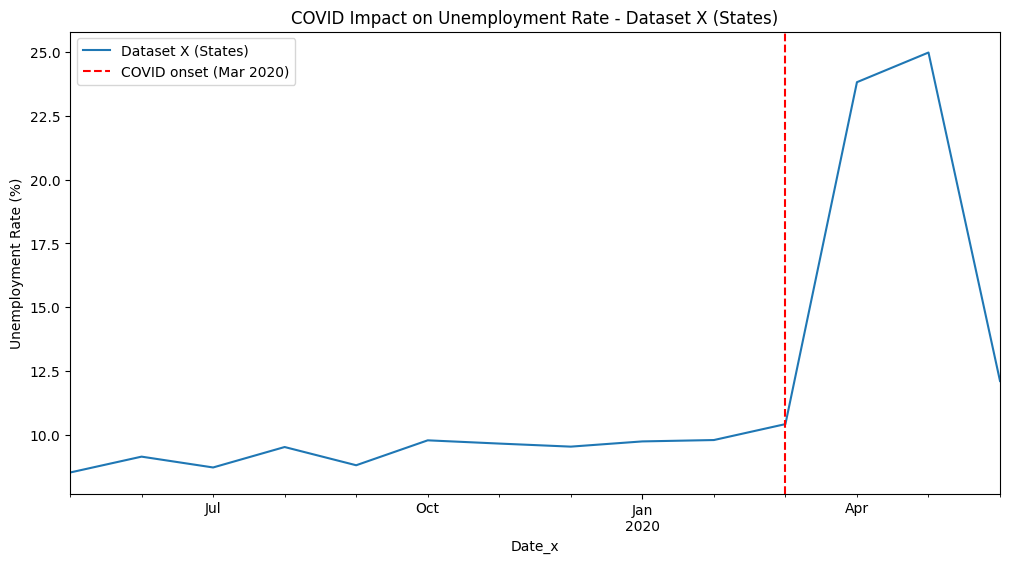

In [ ]:
# --- COVID IMPACT: Dataset X ---
fig, ax = plt.subplots(figsize=(12,6))
merged_df_clean.groupby("Date_x")["Estimated Unemployment Rate (%)_x"].mean().plot(
    ax=ax, label="Dataset X (States)"
)
ax.axvline(pd.to_datetime("2020-03-01"), color="red", linestyle="--", label="COVID onset (Mar 2020)")
ax.set_title("COVID Impact on Unemployment Rate - Dataset X (States)")
ax.set_ylabel("Unemployment Rate (%)")
ax.legend()

plt.savefig("outputs/covid_impact_dataset_x.png", dpi=300, bbox_inches="tight")
plt.show()   # 👈 show before closing
plt.close()  # 👈 close after show


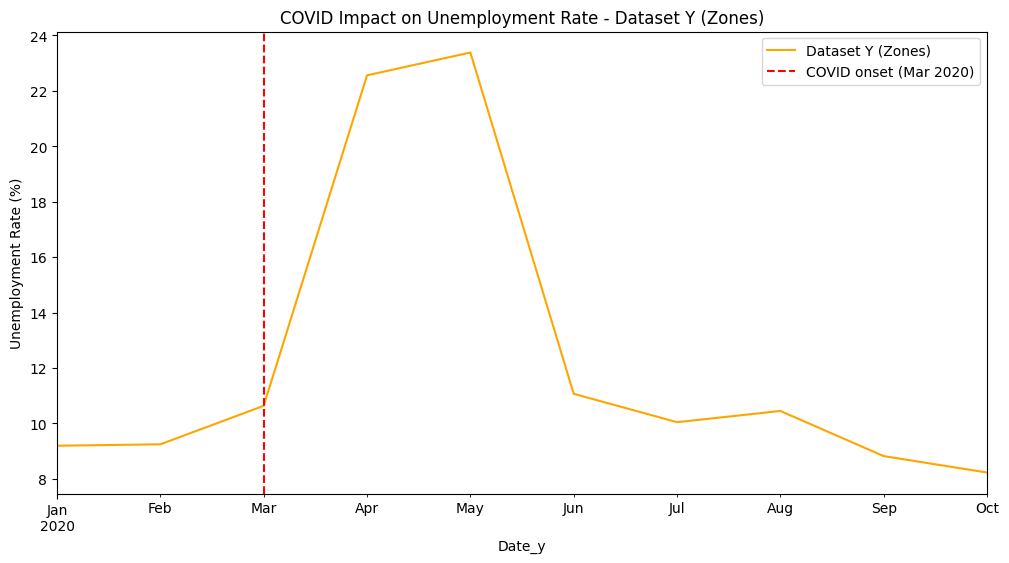

In [ ]:
# --- COVID IMPACT: Dataset Y ---
fig, ax = plt.subplots(figsize=(12,6))
merged_df_clean.groupby("Date_y")["Estimated Unemployment Rate (%)_y"].mean().plot(
    ax=ax, color="orange", label="Dataset Y (Zones)"
)
ax.axvline(pd.to_datetime("2020-03-01"), color="red", linestyle="--", label="COVID onset (Mar 2020)")
ax.set_title("COVID Impact on Unemployment Rate - Dataset Y (Zones)")
ax.set_ylabel("Unemployment Rate (%)")
ax.legend()

plt.savefig("outputs/covid_impact_dataset_y.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()


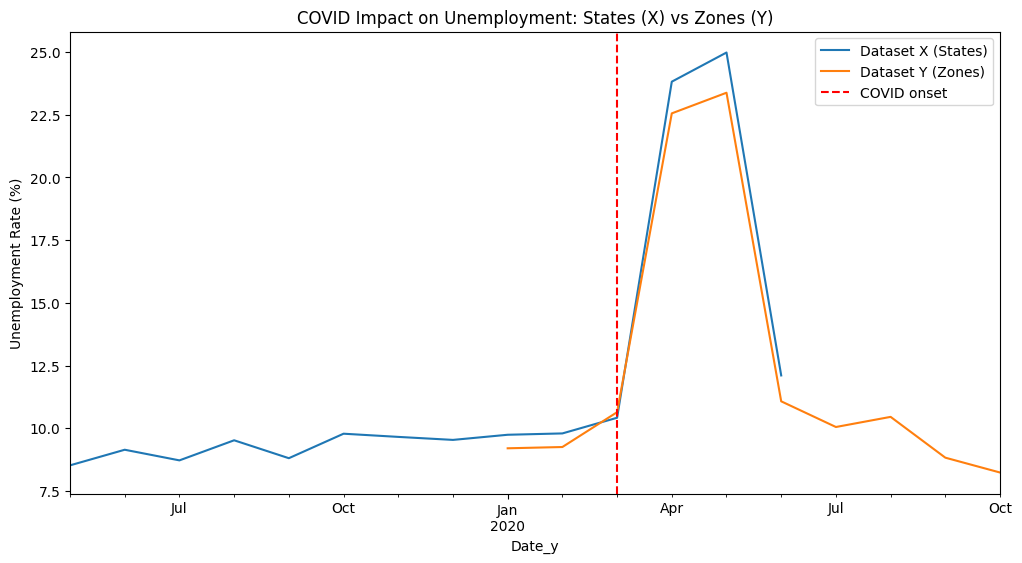

In [ ]:
# --- Combined COVID Impact (X vs Y) ---
fig, ax = plt.subplots(figsize=(12,6))
merged_df_clean.groupby("Date_x")["Estimated Unemployment Rate (%)_x"].mean().plot(
    ax=ax, label="Dataset X (States)"
)
merged_df_clean.groupby("Date_y")["Estimated Unemployment Rate (%)_y"].mean().plot(
    ax=ax, label="Dataset Y (Zones)"
)
ax.axvline(pd.to_datetime("2020-03-01"), color="red", linestyle="--", label="COVID onset")
ax.set_title("COVID Impact on Unemployment: States (X) vs Zones (Y)")
ax.set_ylabel("Unemployment Rate (%)")
ax.legend()

plt.savefig("outputs/covid_impact_comparison.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

## Monthly Seasonal Trend Analysis

In [ ]:
# --- Monthly Seasonal Trend Analysis ---

# Dataset X: States
monthly_x = (
    merged_df_clean.groupby("Month_x")["Estimated Unemployment Rate (%)_x"]
    .mean()
    .reindex(range(1, 13))
)

# Dataset Y: Zones
monthly_y = (
    merged_df_clean.groupby("Month_y")["Estimated Unemployment Rate (%)_y"]
    .mean()
    .reindex(range(1, 13))
)


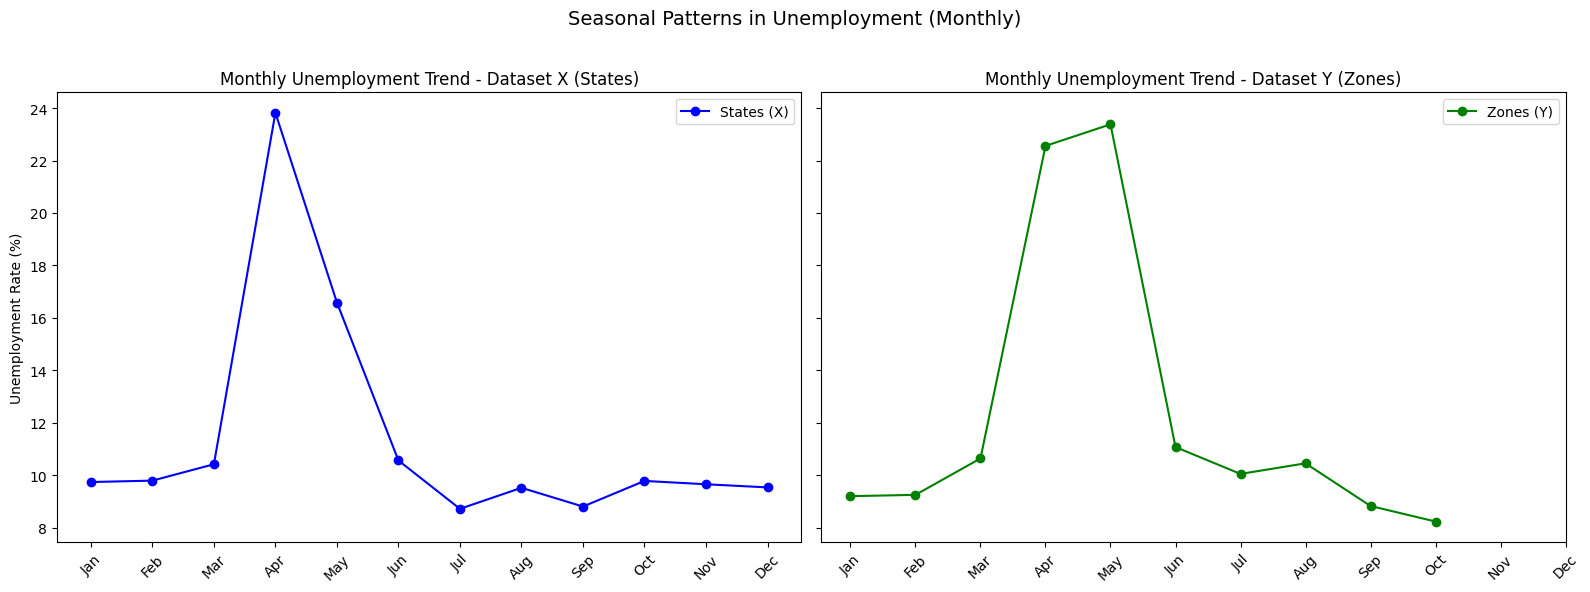

In [ ]:
# --- Plot comparison ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot Dataset X
axes[0].plot(monthly_x.index, monthly_x.values, marker="o", color="blue", label="States (X)")
axes[0].set_title("Monthly Unemployment Trend - Dataset X (States)")
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(
    ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],
    rotation=45
)
axes[0].set_ylabel("Unemployment Rate (%)")
axes[0].legend()


# Plot Dataset Y
axes[1].plot(monthly_y.index, monthly_y.values, marker="o", color="green", label="Zones (Y)")
axes[1].set_title("Monthly Unemployment Trend - Dataset Y (Zones)")
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(
    ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],
    rotation=45
)
axes[1].legend()

plt.suptitle("Seasonal Patterns in Unemployment (Monthly)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])



In [ ]:
# --- Print concise insight ---
print("📌 Seasonal Pattern Insights:")
print("- Dataset X (States):")
print(monthly_x.round(2))
print("\n- Dataset Y (Zones):")
print(monthly_y.round(2))

📌 Seasonal Pattern Insights:
- Dataset X (States):
Month_x
1      9.74
2      9.79
3     10.42
4     23.82
5     16.58
6     10.56
7      8.72
8      9.52
9      8.80
10     9.78
11     9.65
12     9.53
Name: Estimated Unemployment Rate (%)_x, dtype: float64

- Dataset Y (Zones):
Month_y
1      9.20
2      9.25
3     10.64
4     22.56
5     23.38
6     11.07
7     10.05
8     10.45
9      8.82
10     8.23
11      NaN
12      NaN
Name: Estimated Unemployment Rate (%)_y, dtype: float64


## Correlation analysis between Unemployment Rate (%) and Labour Participation Rate (%).

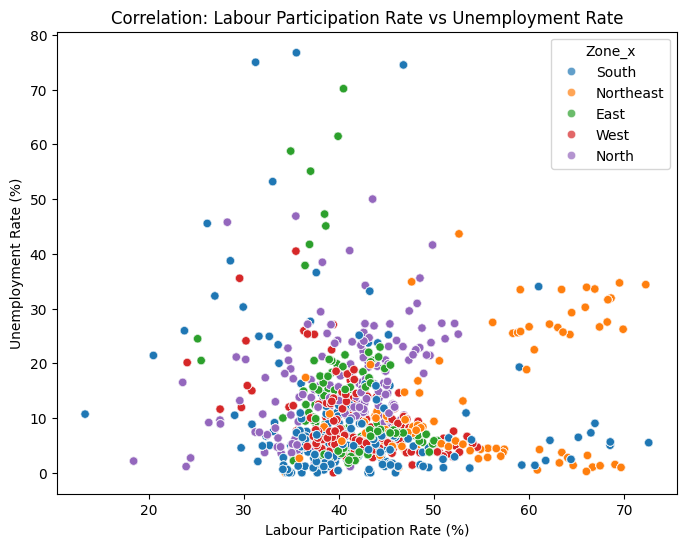

In [ ]:
import seaborn as sns

# --- Correlation Analysis ---
fig, ax = plt.subplots(figsize=(8,6))

# Scatterplot
sns.scatterplot(
    data=merged_df_clean,
    x="Estimated Labour Participation Rate (%)_x",
    y="Estimated Unemployment Rate (%)_x",
    hue="Zone_x",  # color by Zone
    alpha=0.7,
    ax=ax
)

ax.set_title("Correlation: Labour Participation Rate vs Unemployment Rate")
ax.set_xlabel("Labour Participation Rate (%)")
ax.set_ylabel("Unemployment Rate (%)")

plt.savefig("outputs/correlation_scatter.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()



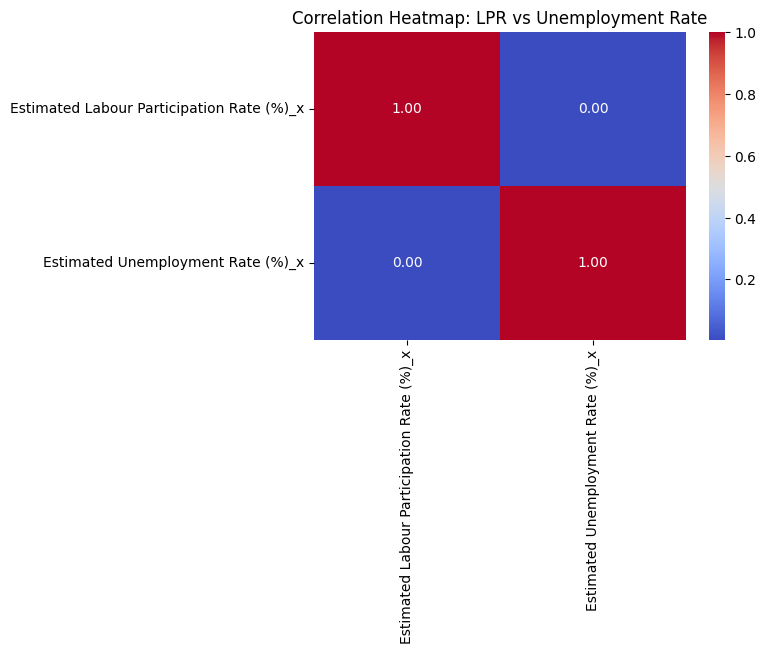

📌 Correlation coefficient between Labour Participation Rate and Unemployment Rate: 0.00


In [ ]:
# --- Correlation Heatmap ---
fig, ax = plt.subplots(figsize=(6,4))
corr_matrix = merged_df_clean[
    ["Estimated Labour Participation Rate (%)_x", "Estimated Unemployment Rate (%)_x"]
].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=ax)
ax.set_title("Correlation Heatmap: LPR vs Unemployment Rate")

plt.savefig("outputs/correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

# --- Print correlation coefficient ---
corr_value = corr_matrix.loc[
    "Estimated Labour Participation Rate (%)_x", "Estimated Unemployment Rate (%)_x"
]
print(f"📌 Correlation coefficient between Labour Participation Rate and Unemployment Rate: {corr_value:.2f}")


# **📊 Visualization with Combined overlay**

# 1. Line Plot (Time Trends + COVID impact)

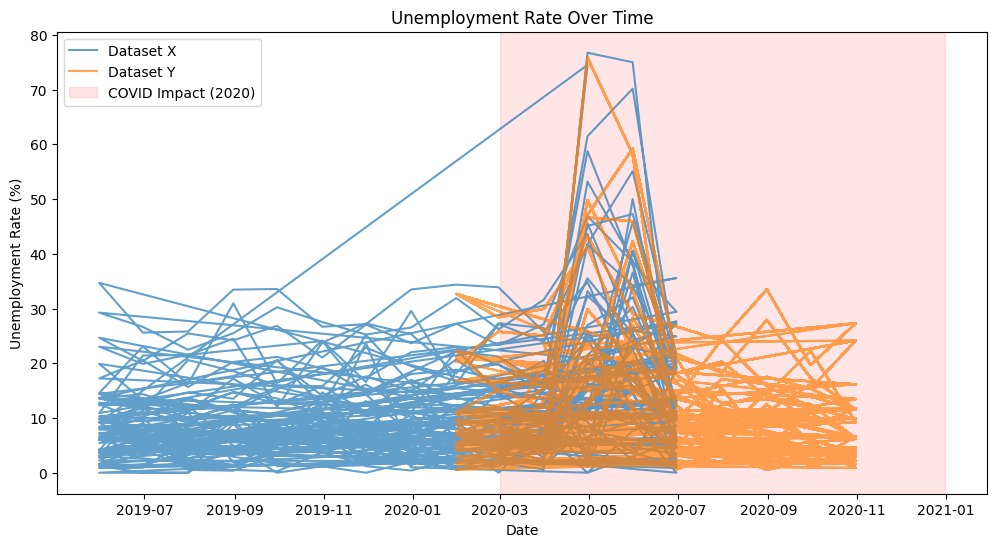

In [ ]:
# --------------------
# 1. Line Plot: National Trend
# --------------------
plt.figure(figsize=(12,6))
plt.plot(merged_df_clean['Date_x'], merged_df_clean['Estimated Unemployment Rate (%)_x'], label='Dataset X', alpha=0.7)
plt.plot(merged_df_clean['Date_y'], merged_df_clean['Estimated Unemployment Rate (%)_y'], label='Dataset Y', alpha=0.7)
plt.axvspan('2020-03-01', '2020-12-31', color='red', alpha=0.1, label='COVID Impact (2020)')
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate Over Time")
plt.legend()
plt.show()

# 2. Seasonality (Monthly Average)

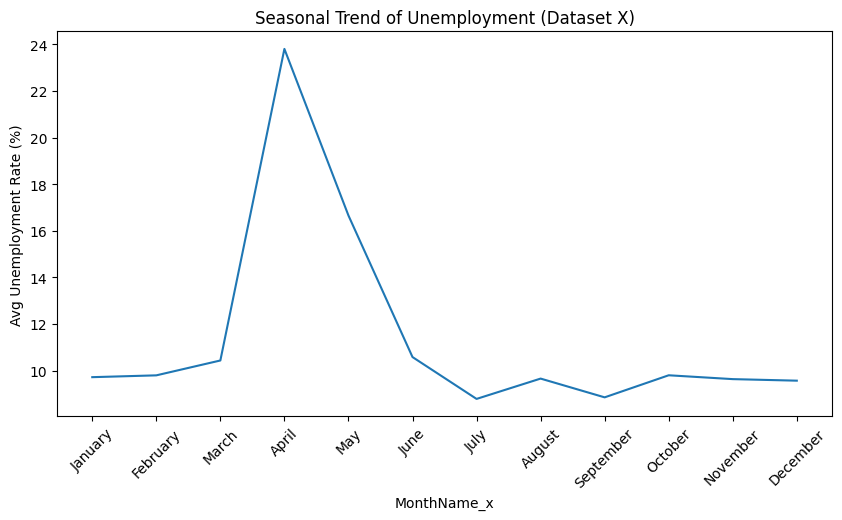

In [ ]:
# Dataset Y
# --------------------
# 2. Seasonality (Monthly Average)
# --------------------
plt.figure(figsize=(10,5))
sns.lineplot(data=merged_df_clean.groupby('MonthName_x')['Estimated Unemployment Rate (%)_x'].mean().reindex(
    ['January','February','March','April','May','June','July','August','September','October','November','December']
))
plt.xticks(rotation=45)
plt.title("Seasonal Trend of Unemployment (Dataset X)")
plt.ylabel("Avg Unemployment Rate (%)")
plt.show()

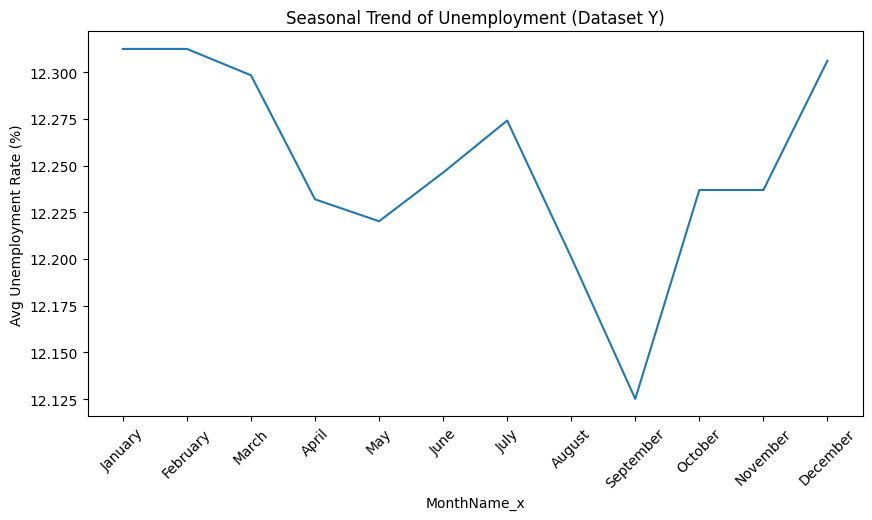

In [ ]:
# Dataset Y
# --------------------
# 2. Seasonality (Monthly Average)
# --------------------
plt.figure(figsize=(10,5))
sns.lineplot(data=merged_df_clean.groupby('MonthName_x')['Estimated Unemployment Rate (%)_y'].mean().reindex(
    ['January','February','March','April','May','June','July','August','September','October','November','December']
))
plt.xticks(rotation=45)
plt.title("Seasonal Trend of Unemployment (Dataset Y)")
plt.ylabel("Avg Unemployment Rate (%)")
plt.show()

# 3. Correlation Heatmap

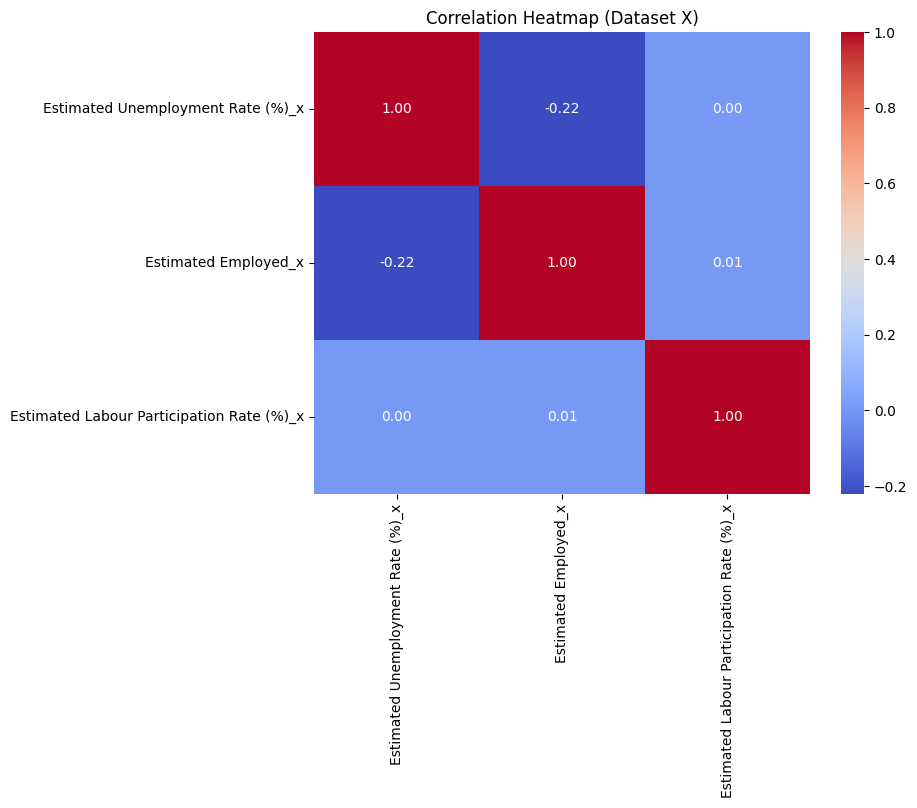

In [ ]:
# --------------------
# 3. Correlation Heatmap
# --------------------
plt.figure(figsize=(8,6))
sns.heatmap(
    merged_df_clean[['Estimated Unemployment Rate (%)_x',
                     'Estimated Employed_x',
                     'Estimated Labour Participation Rate (%)_x']].corr(),
    annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Correlation Heatmap (Dataset X)")
plt.show()

# 4. Regional/State Trends

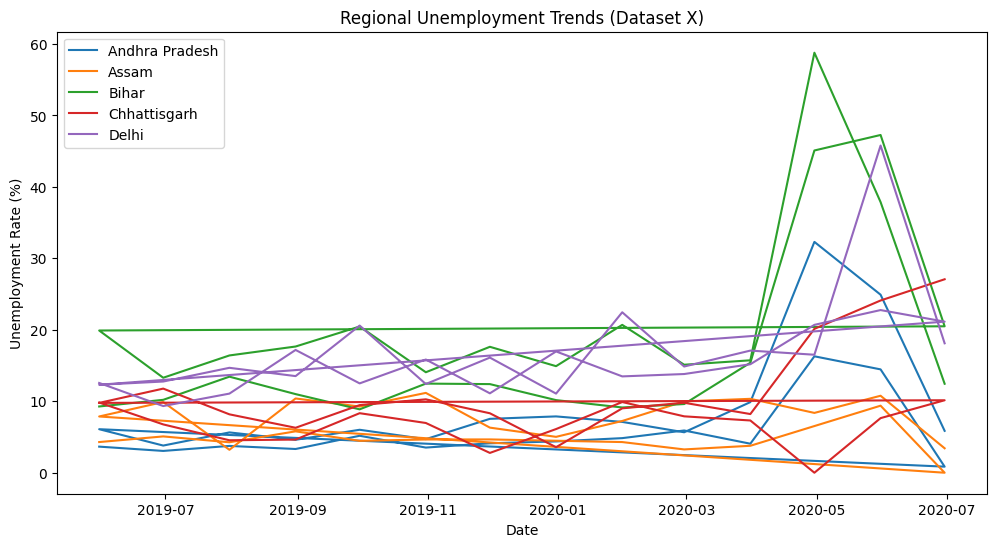

In [ ]:
# --------------------
# 4. Regional Trend (Example)
# --------------------
plt.figure(figsize=(12,6))
for region in merged_df_clean['Region'].unique()[:5]:  # first 5 regions for clarity
    subset = merged_df_clean[merged_df_clean['Region'] == region]
    plt.plot(subset['Date_x'], subset['Estimated Unemployment Rate (%)_x'], label=region)
plt.title("Regional Unemployment Trends (Dataset X)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()

## **📊 Visualization with Side-by-Side & Combined Comparison**

# 1. Unemployment Rate Over Time

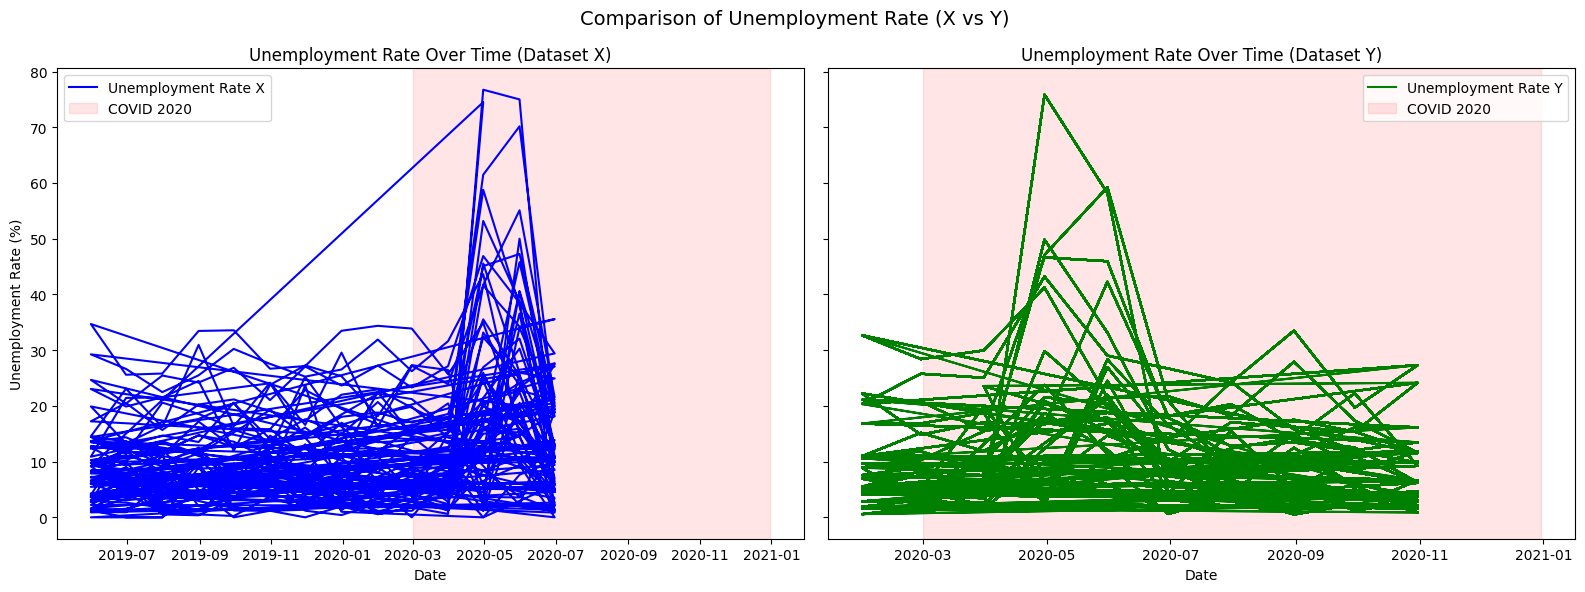

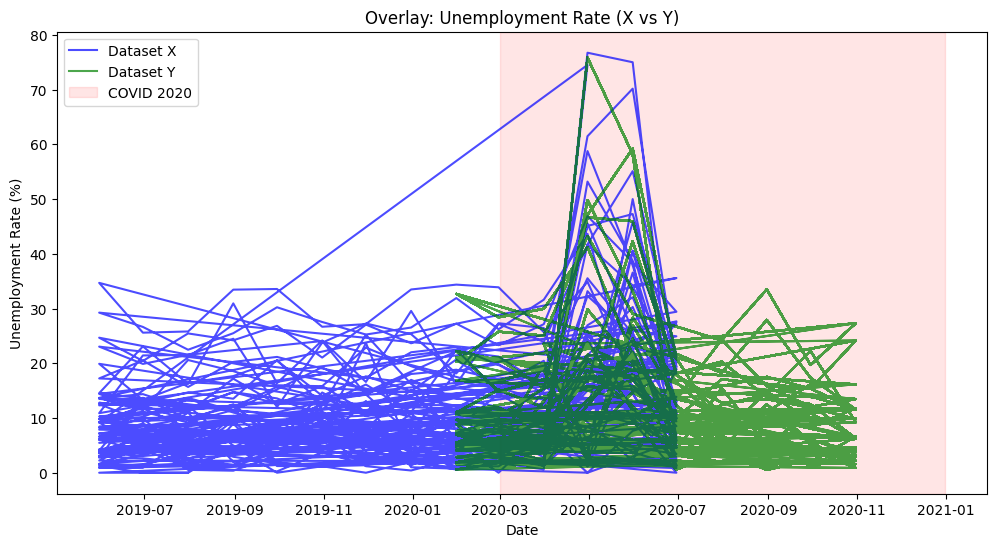

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,6), sharey=True)

# Left: Dataset X
axes[0].plot(merged_df_clean['Date_x'], merged_df_clean['Estimated Unemployment Rate (%)_x'],
             color='blue', label='Unemployment Rate X')
axes[0].axvspan(pd.to_datetime('2020-03-01'), pd.to_datetime('2020-12-31'),
                color='red', alpha=0.1, label='COVID 2020')
axes[0].set_title("Unemployment Rate Over Time (Dataset X)")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Unemployment Rate (%)")
axes[0].legend()

# Right: Dataset Y
axes[1].plot(merged_df_clean['Date_y'], merged_df_clean['Estimated Unemployment Rate (%)_y'],
             color='green', label='Unemployment Rate Y')
axes[1].axvspan(pd.to_datetime('2020-03-01'), pd.to_datetime('2020-12-31'),
                color='red', alpha=0.1, label='COVID 2020')
axes[1].set_title("Unemployment Rate Over Time (Dataset Y)")
axes[1].set_xlabel("Date")
axes[1].legend()

plt.suptitle("Comparison of Unemployment Rate (X vs Y)", fontsize=14)
plt.tight_layout()
plt.show()

# Combined overlay
plt.figure(figsize=(12,6))
plt.plot(merged_df_clean['Date_x'], merged_df_clean['Estimated Unemployment Rate (%)_x'],
         color='blue', alpha=0.7, label='Dataset X')
plt.plot(merged_df_clean['Date_y'], merged_df_clean['Estimated Unemployment Rate (%)_y'],
         color='green', alpha=0.7, label='Dataset Y')
plt.axvspan('2020-03-01', '2020-12-31', color='red', alpha=0.1, label='COVID 2020')
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("Overlay: Unemployment Rate (X vs Y)")
plt.legend()
plt.show()


# 2. Seasonality (Monthly Avg Unemployment)

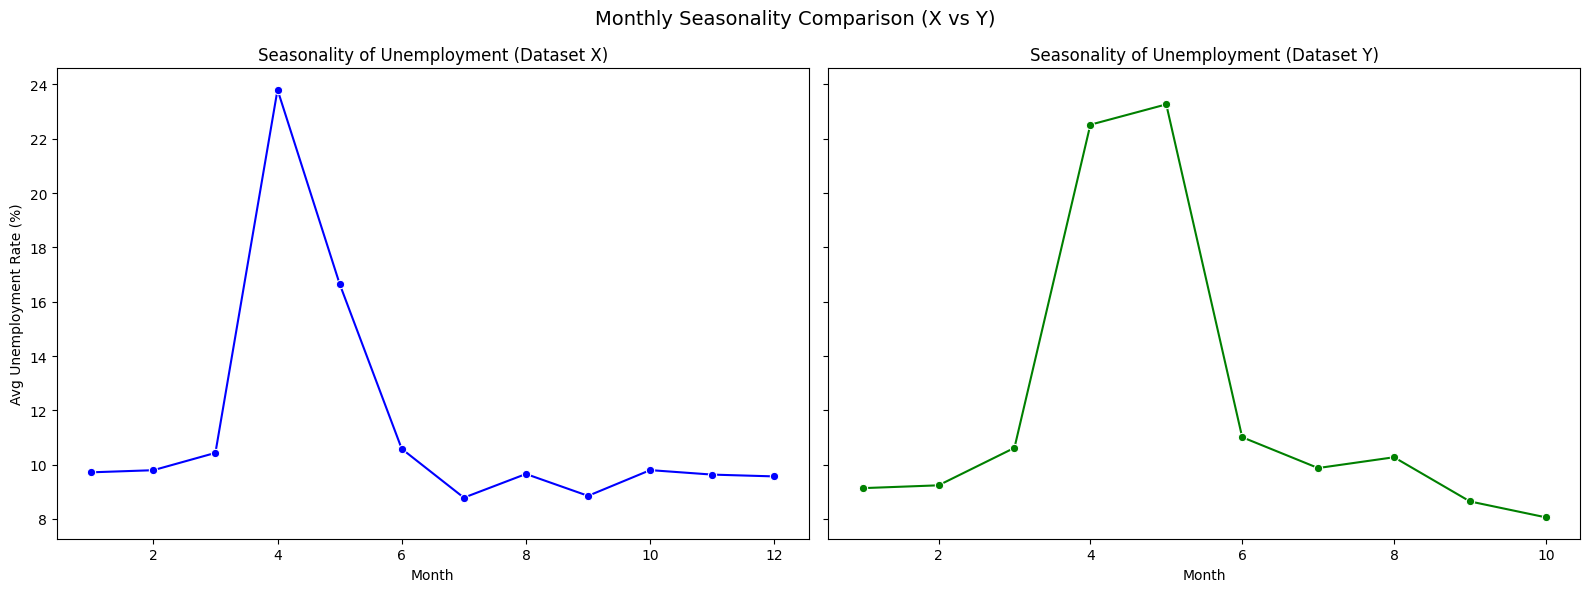

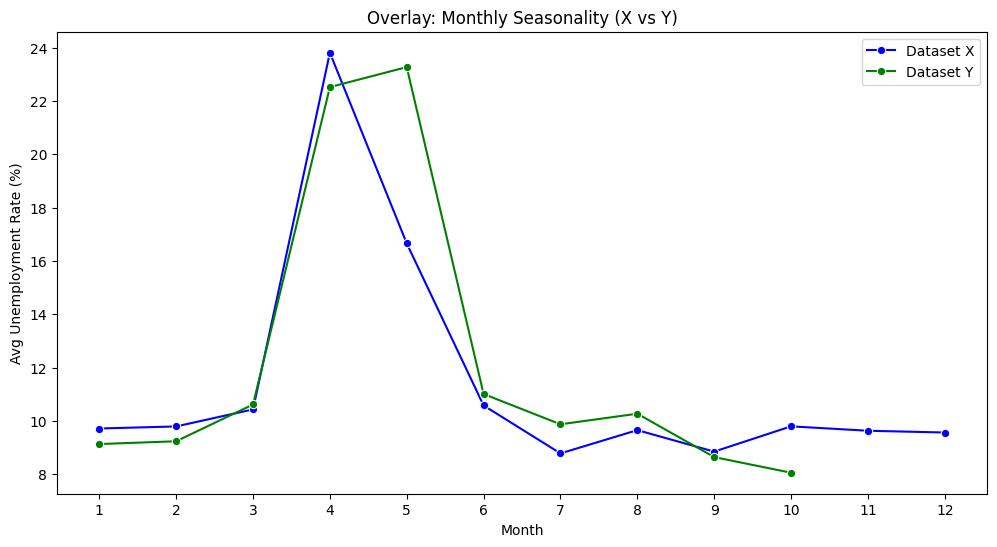

In [ ]:
# Monthly averages
monthly_avg_x = merged_df_clean.groupby('Month_x')['Estimated Unemployment Rate (%)_x'].mean()
monthly_avg_y = merged_df_clean.groupby('Month_y')['Estimated Unemployment Rate (%)_y'].mean()

fig, axes = plt.subplots(1, 2, figsize=(16,6), sharey=True)

# Dataset X
sns.lineplot(x=monthly_avg_x.index, y=monthly_avg_x.values, marker='o', ax=axes[0], color="blue")
axes[0].set_title("Seasonality of Unemployment (Dataset X)")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Avg Unemployment Rate (%)")

# Dataset Y
sns.lineplot(x=monthly_avg_y.index, y=monthly_avg_y.values, marker='o', ax=axes[1], color="green")
axes[1].set_title("Seasonality of Unemployment (Dataset Y)")
axes[1].set_xlabel("Month")

plt.suptitle("Monthly Seasonality Comparison (X vs Y)", fontsize=14)
plt.tight_layout()
plt.show()

# Overlay both on one plot
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_avg_x.index, y=monthly_avg_x.values, marker='o', color="blue", label="Dataset X")
sns.lineplot(x=monthly_avg_y.index, y=monthly_avg_y.values, marker='o', color="green", label="Dataset Y")
plt.xticks(range(1,13))
plt.title("Overlay: Monthly Seasonality (X vs Y)")
plt.xlabel("Month")
plt.ylabel("Avg Unemployment Rate (%)")
plt.legend()
plt.show()


# 3. Correlation Heatmaps (Side-by-Side)

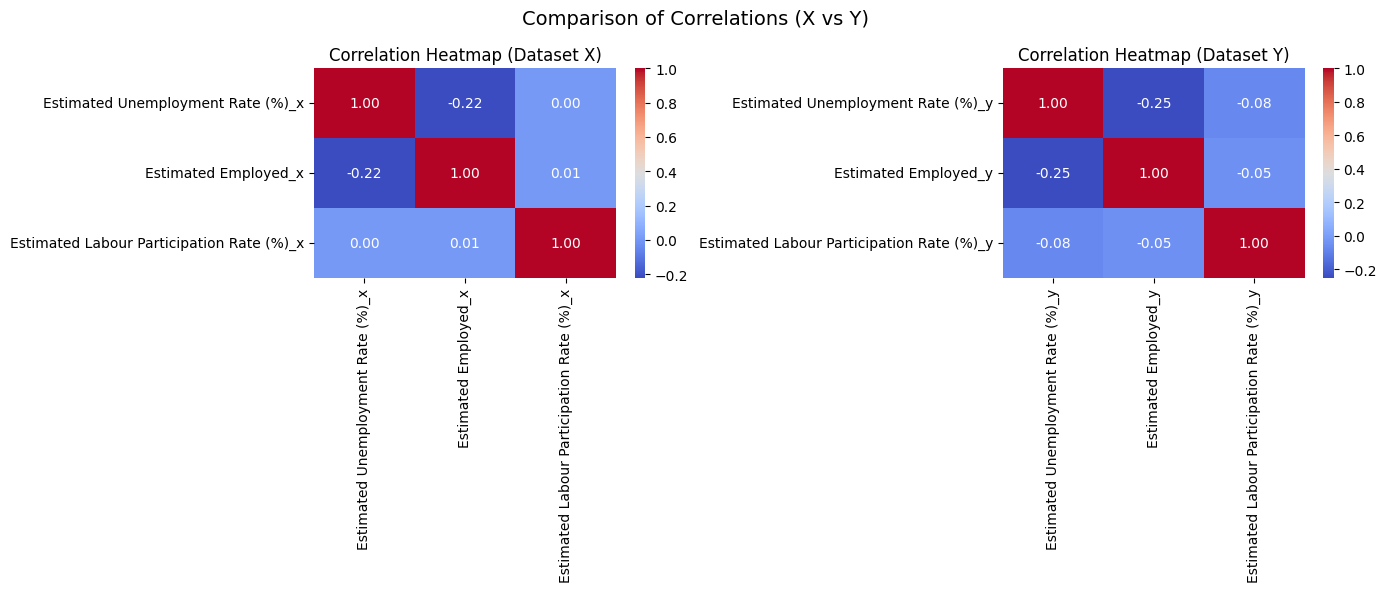

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.heatmap(
    merged_df_clean[['Estimated Unemployment Rate (%)_x',
                     'Estimated Employed_x',
                     'Estimated Labour Participation Rate (%)_x']].corr(),
    annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0]
)
axes[0].set_title("Correlation Heatmap (Dataset X)")

sns.heatmap(
    merged_df_clean[['Estimated Unemployment Rate (%)_y',
                     'Estimated Employed_y',
                     'Estimated Labour Participation Rate (%)_y']].corr(),
    annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1]
)
axes[1].set_title("Correlation Heatmap (Dataset Y)")

plt.suptitle("Comparison of Correlations (X vs Y)", fontsize=14)
plt.tight_layout()
plt.show()


# 4. Regional / State-level Trends

In [ ]:
print(merged_df_clean.columns.tolist())


['Region', 'Date_x', 'Frequency_x', 'Estimated Unemployment Rate (%)_x', 'Estimated Employed_x', 'Estimated Labour Participation Rate (%)_x', 'Area', 'Date_y', 'Frequency_y', 'Estimated Unemployment Rate (%)_y', 'Estimated Employed_y', 'Estimated Labour Participation Rate (%)_y', 'Region.1', 'longitude', 'latitude', 'Date_x_clean', 'Date_y_clean', 'Date_x_Year', 'Date_x_Month', 'Date_x_MonthName', 'Date_x_Quarter', 'Date_y_Year', 'Date_y_Month', 'Date_y_MonthName', 'Date_y_Quarter', 'Year_x', 'Month_x', 'MonthName_x', 'Quarter_x', 'Year_y', 'Month_y', 'MonthName_y', 'Quarter_y']


In [ ]:
print("Unique regions in Dataset X:", merged_df_clean['Region'].unique()[:10])
print("Unique regions in Dataset Y:", merged_df_clean['Region.1'].unique()[:10])
print("Shape X:", merged_df_clean['Region'].nunique(), "Shape Y:", merged_df_clean['Region.1'].nunique())


Unique regions in Dataset X: ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir']
Unique regions in Dataset Y: ['South' 'Northeast' 'East' 'West' 'North']
Shape X: 27 Shape Y: 5


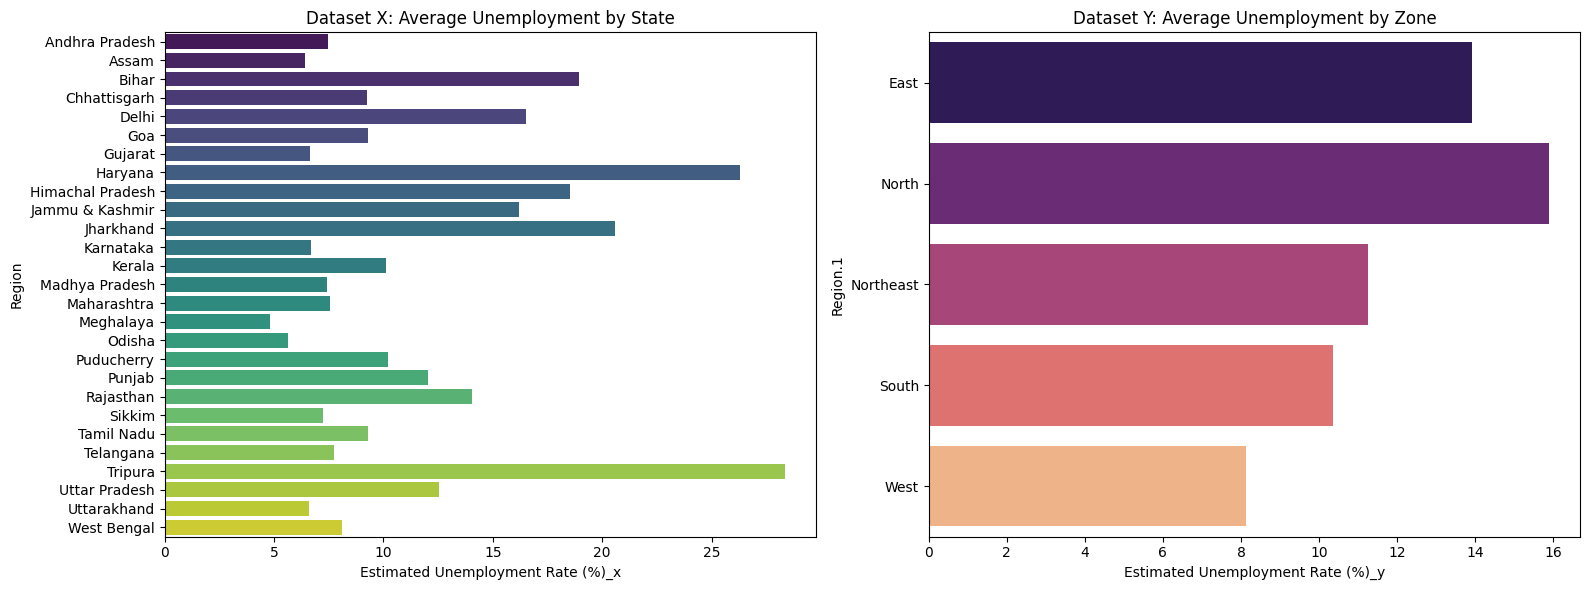

In [ ]:
# Average unemployment per state (X dataset)
region_avg_x = merged_df_clean.groupby('Region')['Estimated Unemployment Rate (%)_x'].mean().reset_index()

# Average unemployment per zone (Y dataset)
region_avg_y = merged_df_clean.groupby('Region.1')['Estimated Unemployment Rate (%)_y'].mean().reset_index()

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.barplot(data=region_avg_x, x='Estimated Unemployment Rate (%)_x', y='Region', ax=axes[0], palette="viridis")
axes[0].set_title("Dataset X: Average Unemployment by State")

sns.barplot(data=region_avg_y, x='Estimated Unemployment Rate (%)_y', y='Region.1', ax=axes[1], palette="magma")
axes[1].set_title("Dataset Y: Average Unemployment by Zone")

plt.tight_layout()
plt.show()


In [ ]:
# State → Zone mapping
state_to_zone = {
    # South
    'Andhra Pradesh': 'South',
    'Telangana': 'South',
    'Karnataka': 'South',
    'Tamil Nadu': 'South',
    'Kerala': 'South',
    'Puducherry': 'South',
    'Goa': 'South',

    # North
    'Delhi': 'North',
    'Haryana': 'North',
    'Punjab': 'North',
    'Himachal Pradesh': 'North',
    'Uttarakhand': 'North',
    'Jammu & Kashmir': 'North',
    'Ladakh': 'North',
    'Chandigarh': 'North',

    # East
    'Bihar': 'East',
    'Jharkhand': 'East',
    'Odisha': 'East',
    'West Bengal': 'East',

    # West
    'Rajasthan': 'West',
    'Gujarat': 'West',
    'Maharashtra': 'West',
    'Madhya Pradesh': 'West',
    'Chhattisgarh': 'West',

    # Northeast
    'Assam': 'Northeast',
    'Arunachal Pradesh': 'Northeast',
    'Manipur': 'Northeast',
    'Meghalaya': 'Northeast',
    'Mizoram': 'Northeast',
    'Nagaland': 'Northeast',
    'Sikkim': 'Northeast',
    'Tripura': 'Northeast'
}


In [ ]:
# Add Zone column to Dataset X using mapping
merged_df_clean['Zone_x'] = merged_df_clean['Region'].map(state_to_zone)

# Drop rows where mapping was not found (if any)
merged_df_clean = merged_df_clean.dropna(subset=['Zone_x'])


In [ ]:
# Dataset X (states aggregated to zones)
zone_avg_x = merged_df_clean.groupby('Zone_x')['Estimated Unemployment Rate (%)_x'].mean().reset_index()

# Dataset Y (already in zones)
zone_avg_y = merged_df_clean.groupby('Region.1')['Estimated Unemployment Rate (%)_y'].mean().reset_index()

# Rename columns for clarity
zone_avg_x.rename(columns={'Zone_x': 'Zone', 'Estimated Unemployment Rate (%)_x': 'Unemployment_X'}, inplace=True)
zone_avg_y.rename(columns={'Region.1': 'Zone', 'Estimated Unemployment Rate (%)_y': 'Unemployment_Y'}, inplace=True)

# Merge both zone-level datasets
zone_comparison = pd.merge(zone_avg_x, zone_avg_y, on='Zone', how='inner')
print(zone_comparison)


        Zone  Unemployment_X  Unemployment_Y
0       East       13.321429       13.916000
1      North       16.070323       16.821850
2  Northeast       12.569789       11.261691
3      South        8.655526       10.364458
4       West        8.985286        8.123471


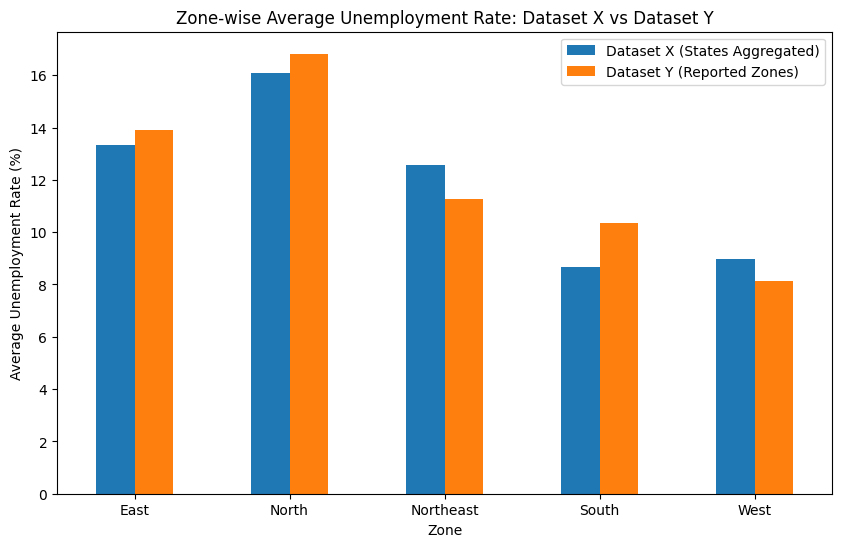

In [ ]:
# Barplot comparison
zone_comparison.plot(x='Zone', kind='bar', figsize=(10,6))
plt.title("Zone-wise Average Unemployment Rate: Dataset X vs Dataset Y")
plt.ylabel("Average Unemployment Rate (%)")
plt.xticks(rotation=0)
plt.legend(["Dataset X (States Aggregated)", "Dataset Y (Reported Zones)"])
plt.show()


In [ ]:
import os

# --------------------------
# Ensure outputs folder exists
# --------------------------
os.makedirs("outputs", exist_ok=True)

# --------------------------
# Save Comparison Plot as PNG
# --------------------------
fig, ax = plt.subplots(figsize=(10,6))
zone_comparison.plot(
    x='Zone',
    kind='bar',
    ax=ax,
    color=['#1f77b4', '#ff7f0e']
)
plt.title("Zone-wise Average Unemployment Rate: Dataset X vs Dataset Y")
plt.ylabel("Average Unemployment Rate (%)")
plt.xticks(rotation=0)
plt.legend(["Dataset X (States Aggregated)", "Dataset Y (Reported Zones)"])

# Save chart
plt.tight_layout()
plt.savefig("outputs/zone_comparison.png")
plt.close()





In [ ]:
# --------------------------
# Print Insight Summary
# --------------------------
for _, row in zone_comparison.iterrows():
    zone = row['Zone']
    x_val = row['Unemployment_X']
    y_val = row['Unemployment_Y']

    if x_val > y_val:
        insight = f"Dataset X shows HIGHER unemployment than Dataset Y in {zone}."
    elif x_val < y_val:
        insight = f"Dataset X shows LOWER unemployment than Dataset Y in {zone}."
    else:
        insight = f"Both datasets report the SAME unemployment in {zone}."

    print(f"{zone}: X={x_val:.2f}%, Y={y_val:.2f}% → {insight}")

print("\n✅ Chart saved in 'outputs/zone_comparison.png'")

East: X=13.32%, Y=13.92% → Dataset X shows LOWER unemployment than Dataset Y in East.
North: X=16.07%, Y=16.82% → Dataset X shows LOWER unemployment than Dataset Y in North.
Northeast: X=12.57%, Y=11.26% → Dataset X shows HIGHER unemployment than Dataset Y in Northeast.
South: X=8.66%, Y=10.36% → Dataset X shows LOWER unemployment than Dataset Y in South.
West: X=8.99%, Y=8.12% → Dataset X shows HIGHER unemployment than Dataset Y in West.

✅ Chart saved in 'outputs/zone_comparison.png'


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Prepare data
df_plot = merged_df_clean.copy()
df_plot["Date_x"] = pd.to_datetime(df_plot["Date_x"], errors="coerce")
df_plot = df_plot.dropna(subset=["Date_x"])

# Unique states and zones
states = df_plot["Region"].unique()
zones = df_plot["Region.1"].unique()

# Create figure
fig = go.Figure()

# Add traces for each state (Dataset X)
for state in states:
    df_state = df_plot[df_plot["Region"] == state]
    fig.add_trace(go.Scatter(
        x=df_state["Date_x"],
        y=df_state["Estimated Unemployment Rate (%)_x"],
        mode='lines',
        name=f"{state} (State)",
        visible=False  # Hide initially
    ))

# Add traces for each zone (Dataset Y)
for zone in zones:
    df_zone = df_plot[df_plot["Region.1"] == zone]
    fig.add_trace(go.Scatter(
        x=df_zone["Date_x"],
        y=df_zone["Estimated Unemployment Rate (%)_y"],
        mode='lines',
        name=f"{zone} (Zone)",
        visible=False  # Hide initially
    ))

# Add COVID vertical line
fig.add_shape(
    type="line",
    x0=pd.to_datetime("2020-03-01"),
    x1=pd.to_datetime("2020-03-01"),
    y0=0,
    y1=max(df_plot["Estimated Unemployment Rate (%)_x"].max(), df_plot["Estimated Unemployment Rate (%)_y"].max()),
    line=dict(color="red", dash="dash")
)

fig.add_annotation(
    x=pd.to_datetime("2020-03-01"),
    y=max(df_plot["Estimated Unemployment Rate (%)_x"].max(), df_plot["Estimated Unemployment Rate (%)_y"].max()),
    text="COVID onset (Mar 2020)",
    showarrow=True,
    arrowhead=2,
    ax=-40,
    ay=-40
)

# --- Create dropdown buttons ---
buttons = []

# State buttons
for i, state in enumerate(states):
    visibility = [False]*(len(states)+len(zones))
    visibility[i] = True
    buttons.append(dict(label=state,
                        method="update",
                        args=[{"visible": visibility},
                              {"title": f"Unemployment Rate - {state} (State)"}]))

# Zone buttons
for i, zone in enumerate(zones):
    visibility = [False]*(len(states)+len(zones))
    visibility[len(states)+i] = True
    buttons.append(dict(label=zone,
                        method="update",
                        args=[{"visible": visibility},
                              {"title": f"Unemployment Rate - {zone} (Zone)"}]))

# Add an "All" button
visibility_all = [True]*(len(states)+len(zones))
buttons.insert(0, dict(label="All",
                        method="update",
                        args=[{"visible": visibility_all},
                              {"title": "Unemployment Rate - All States & Zones"}]))

fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons)],
    title="Interactive Unemployment Trends (States & Zones)",
    xaxis_title="Date",
    yaxis_title="Unemployment Rate (%)",
    hovermode="x unified"
)

fig.show()


In [ ]:
# --- Save merged_df_clean as a pickle file ---
import pandas as pd

# Replace this with your final cleaned dataframe
df_to_save = merged_df_clean.copy()

# Save as pickle
df_to_save.to_pickle("outputs/unemployment_data.pkl")

print("Pickle file saved at: outputs/unemployment_data.pkl")


Pickle file saved at: outputs/unemployment_data.pkl
